# READ ME

1. The notebook should be on L4 GPU.
2. Upload the 'fine_tuned_blip_base_celeba.zip' zip file to the colab folder.
3. Upload input images from images (from github) for which captions are to be generated.
4. Run all the cells.
5. Caption will be generated for the input images.

**Additional:**

If you want to test the model on a particular image then at the end of examples the last cell has the code to execute in comments. Remove the comments and execute it.

# Packages

In [1]:
import zipfile
import os
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Loading fine tuned model

In [2]:
# Unzip the fine tuned model folder
zip_path = "fine_tuned_blip_base_celeba.zip"  # Path to the zip file
unzip_dir = "fine_tuned_blip_base_celeba"     # Directory to unzip into

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [4]:
print(f"Model unzipped to {unzip_dir}")

Model unzipped to fine_tuned_blip_base_celeba


In [5]:
# Load the fine tuned model and processor
model = BlipForConditionalGeneration.from_pretrained(unzip_dir, torch_dtype=torch.float16)
processor = BlipProcessor.from_pretrained(unzip_dir)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

# Testing the model on example images

In [7]:
def test_random_image(image_path, model, processor, device):
    """
    Test the fine-tuned model on a random image and generate a caption.
    Display the input image alongside the generated caption.

    Args:
        image_path (str): Path to the image file.
        model: Fine-tuned model.
        processor: Processor for preprocessing the image.
        device: Device to run the model on.

    Returns:
        str: Generated caption for the image.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor.image_processor(images=image, return_tensors="pt")["pixel_values"].to(device)

    # Generate prediction
    model.eval()
    with torch.no_grad():
        outputs = model.generate(
            pixel_values=pixel_values,
            max_length=64,
            num_beams=5,
            early_stopping=True
        )

    # Decode the generated caption
    caption = processor.tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Display the image and caption
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    return caption

# Examples

## Image 1

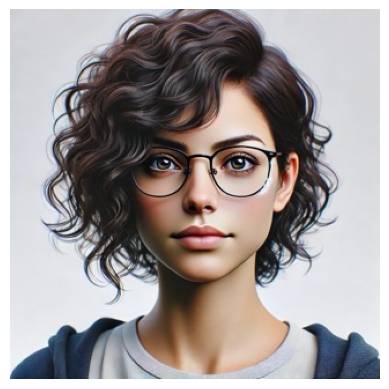

Generated Caption: the person in the image is a young woman with glasses and a curly hairstyle. she has a heart - shaped face, a small nose, and a thin mouth. her eyes are large and round, and she is wearing glasses. the woman is also wearing a necklace, which adds to her overall appearance.


In [8]:
input_image_path = "img1.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 1:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young woman with glasses and a curly hairstyle. she has a heart - shaped face, a small nose, and a thin mouth. her eyes are large and round, and she is wearing glasses. the woman is also wearing a necklace, which adds to her overall appearance.

**Generated Image:**

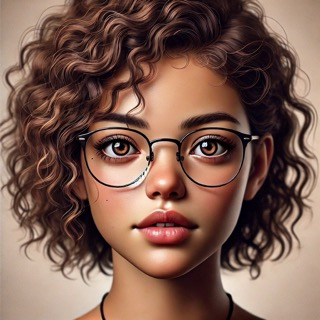

## Image 2

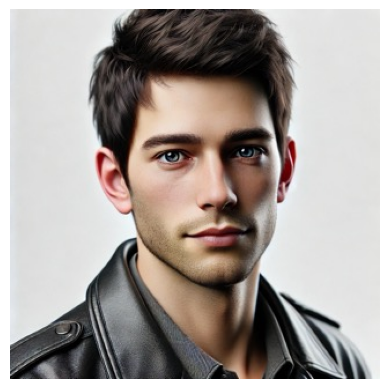

Generated Caption: the person in the image is a young man with a shaved head, wearing a black leather jacket. he has a prominent nose, thin lips, and a small mouth. the man ' s eyes are described as being large and blue, and he is wearing glasses. the image also shows a close - up of


In [9]:
input_image_path = "img2.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 2:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young man with a shaved head, wearing a black leather jacket. he has a prominent nose, thin lips, and a small mouth. the man ' s eyes are described as being large and blue, and he is wearing glasses. the image also shows a close - up of

**Generated Image:**

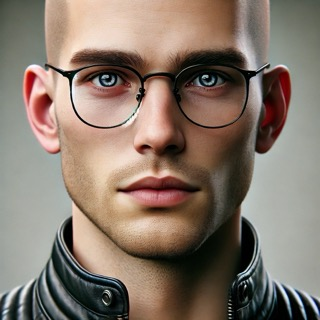


## Image 3

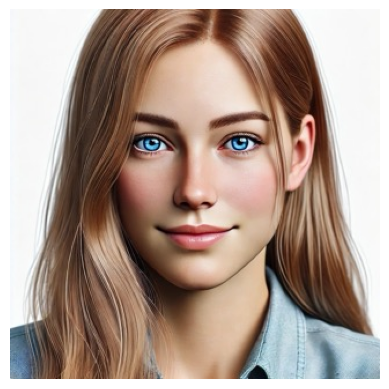

Generated Caption: a young woman with long blonde hair and blue eyes, wearing a denim jacket


In [10]:
input_image_path = "img3.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 3:**

**Prompt:**

Generate a realistic image of a person based on the description - a young woman with long blonde hair and blue eyes, wearing a denim jacket

**Generated Image:**

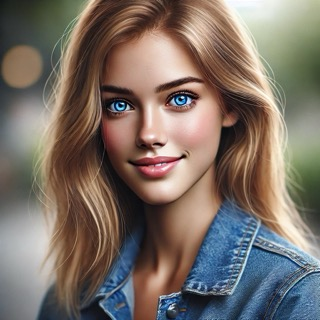

## Image 4

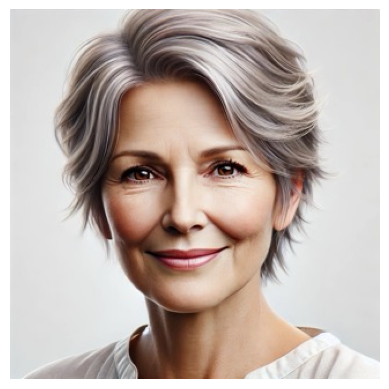

Generated Caption: the person in the image is a woman, and she is wearing glasses. her eye shape is described as being large, and she has a smile on her face. her nose is described as being small and her lips are described as being thick. the woman is wearing a necklace and has a smile on her face


In [11]:
input_image_path = "img4.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 4:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a woman, and she is wearing glasses. her eye shape is described as being large, and she has a smile on her face. her nose is described as being small and her lips are described as being thick. the woman is wearing a necklace and has a smile on her face

**Generated Image:**

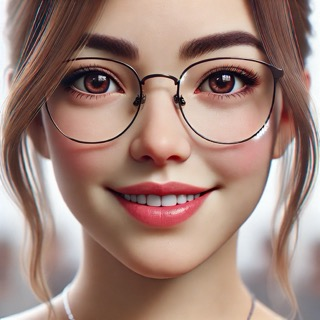

## Image 5

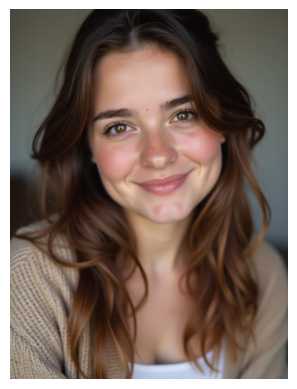

Generated Caption: the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a smile on her face. her eyes are large and brown, and she is wearing glasses. the woman is wearing a sweater, and her hair is styled in a ponytail


In [12]:
input_image_path = "img5.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 5:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a smile on her face. her eyes are large and brown, and she is wearing glasses. the woman is wearing a sweater, and her hair is styled in a ponytail

**Generated Image:**

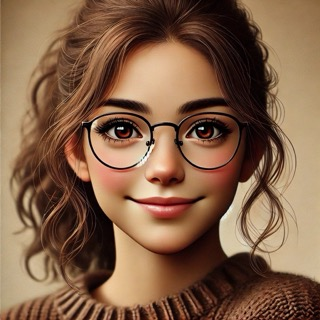

## Image 6

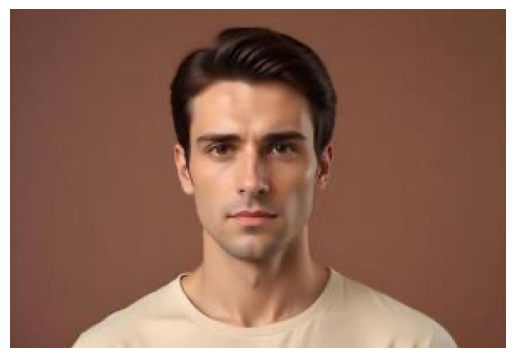

Generated Caption: the person in the image is a young man with a beard, wearing glasses. he has a round face, a small nose, and a thin mouth. his eyes are large and expressive, and he is wearing a white shirt. the image also shows a close - up of his face, which includes his eyes


In [13]:
input_image_path = "img6.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 6:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young man with a beard, wearing glasses. he has a round face, a small nose, and a thin mouth. his eyes are large and expressive, and he is wearing a white shirt. the image also shows a close - up of his face, which includes his eyes

**Generated Image:**

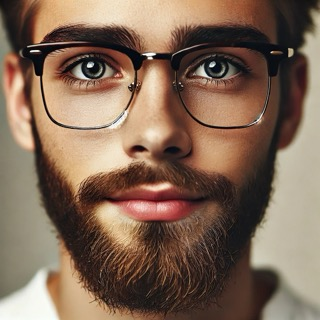

## Image 7

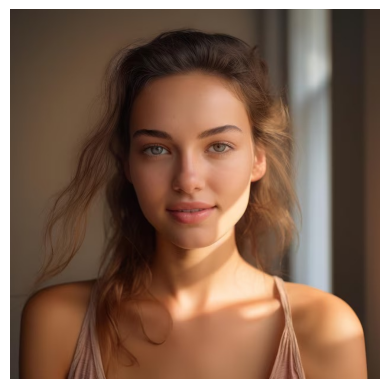

Generated Caption: the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a thin mouth. her eyes are large and brown, and she is wearing glasses. her hair is blonde, and she has a small nose. the woman is wearing a


In [14]:
input_image_path = "img7.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 7:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a thin mouth. her eyes are large and brown, and she is wearing glasses. her hair is blonde, and she has a small nose. the woman is wearing a

**Generated Image:**

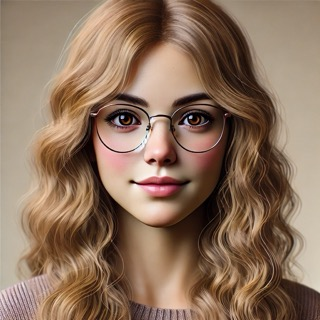

## Image 8

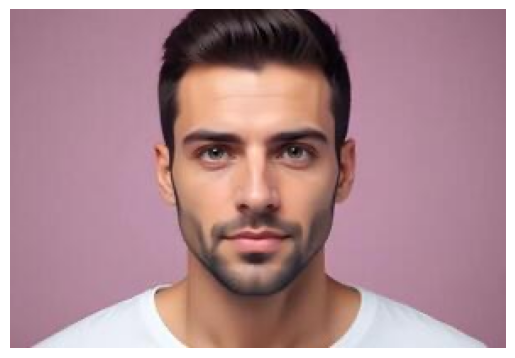

Generated Caption: the person in the image is a young man with a beard, wearing a white shirt. he has a round face, a small nose, and a thin mouth. his eyes are brown and have a distinct shape, which could be described as almond - shaped. the young man is wearing glasses and has a thin


In [15]:
input_image_path = "img8.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 8:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young man with a beard, wearing a white shirt. he has a round face, a small nose, and a thin mouth. his eyes are brown and have a distinct shape, which could be described as almond - shaped. the young man is wearing glasses and has a thin

**Generated Image:**

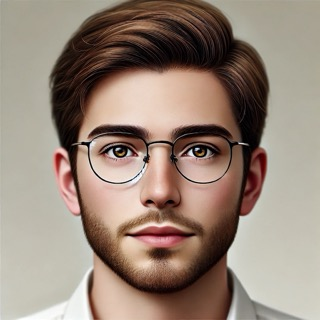

# Test on a particular image

In [16]:
#input_image_path = "path_to_particular_image"
#caption = test_random_image(input_image_path, model, processor, device)
#print(f"Generated Caption: {caption}")